# Übung "Grundlagen Statistik"
#### SL "Grundlagen Data Science" im WS 23/24 an der HTW Berlin
#### Heinke Hihn

# 1. Korrelation
1. Laden Sie die Daten in `cereal.csv` und betrachten Sie die ersten Zeilen und Spalten. Weitere Informationen finden Sie in `cereal_readme.txt`
    1. Welche Merkmale gitb es? 
    2. Wie viele Samples hat die Stichprobe?
4. Das Merkmal `rating` beinhaltet die von Konsumenten gegeben Wertung des Produkts. Mit welchem anderen Merkmal korreliert `rating` am stärksten nach dem Pearson Maß? Mit welchem am wenigsten? Beantworten Sie zur stärksten Korrelation die folgenden Fragen:
    1. In welche Richtung ist diese Korrelation?
    2. Wie würden Sie diese in Worten ausdrücken?
    3. Stellen Sie die Korrelation grafisch als `scatter plot` da

In [6]:
import pandas as pd

data = pd.read_csv("cereal.csv", delimiter=",")

(77, 16)

In [ ]:
data.shape

In [7]:
data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


<ipython-input-4-f3d6645878f2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr("spearman")


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000000,-0.066970,0.535217,0.290765,-0.142801,0.080772,0.596302,-0.013812,0.314042,0.152254,0.622532,0.047411,-0.705181
protein,-0.066970,1.000000,0.230563,-0.114397,0.680429,-0.001905,-0.285281,0.711829,-0.006971,0.283255,0.293205,-0.362559,0.511389
fat,0.535217,0.230563,1.000000,0.034785,0.119626,-0.297343,0.331163,0.322380,0.116609,0.236715,0.287783,-0.245754,-0.443560
sodium,0.290765,-0.114397,0.034785,1.000000,-0.168594,0.376945,-0.014469,-0.115369,0.439967,-0.145355,0.263954,0.145612,-0.242567
fiber,-0.142801,0.680429,0.119626,-0.168594,1.000000,-0.148589,-0.109703,0.852266,-0.042424,0.316592,0.348492,-0.507596,0.489379
carbo,0.080772,-0.001905,-0.297343,0.376945,-0.148589,1.000000,-0.455874,-0.197597,0.191142,-0.110154,0.119288,0.319358,0.241357
sugars,0.596302,-0.285281,0.331163,-0.014469,-0.109703,-0.455874,1.000000,-0.007505,0.304366,0.073918,0.446818,-0.056660,-0.809203
potass,-0.013812,0.711829,0.322380,-0.115369,0.852266,-0.197597,-0.007505,1.000000,0.007495,0.360447,0.429729,-0.535341,0.306618
vitamins,0.314042,-0.006971,0.116609,0.439967,-0.042424,0.191142,0.304366,0.007495,1.000000,0.269839,0.386684,0.077897,-0.332203
shelf,0.152254,0.283255,0.236715,-0.145355,0.316592,-0.110154,0.073918,0.360447,0.269839,1.000000,0.262832,-0.314471,0.069803


<AxesSubplot:xlabel='rating', ylabel='sugars'>

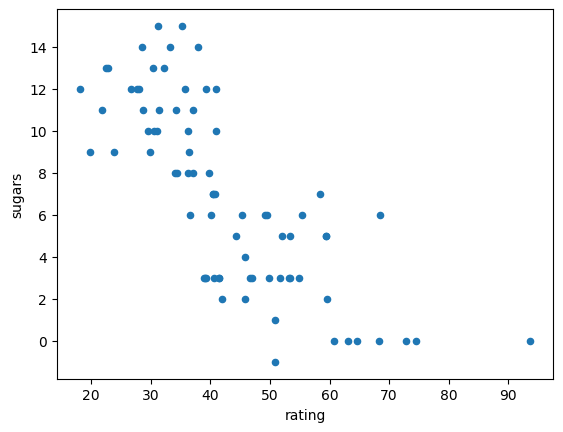

In [10]:
from matplotlib import pyplot as plt
data.plot.scatter(x="rating", y="sugars")

# 2. Chi-Quadrat Test

Die Daten in `arthritis.csv` wurden in einem medizinischen Test erhoben und sollen untersuchen, ob sich der Zustand von Patienten mit Arthritis nach der Gabe eines neuen Medikaments verbessert. 

1. Laden Sie die Daten in `arthritis.csv` und betrachten Sie die ersten Zeilen und Spalten.
2. Der Datensatz enhält fehlende Werte im Merkmal `Improved`. Ersetzen Sie diese mit `"None"`.
3. Formulieren Sie eine passende Forschungsfrage
4. Formulieren Sie eine passende Hypothese
5. Testen Sie die Hypothese mit einem Chi-Quadrat Test
    1. Erstellen Sie die Kontingenztafel zu den Daten. Nutzen Sie `Treatment` als Merkmal A und `Improvement` als Merkmal B. Die Tafel soll auch die Randwerte (`margins`) enthalten.
    2. Welche Dimension hat die Tafel?
    3. Bestimmen Sie die Erwartungswerte. Tragen Sie diese nicht in die Kontingenztafel ein, sondern erstellen S
    4. Berechnen Sie den Chi-Quadrat Test basierend auf der Kontingenztafel. Hinweis: nutzen Sie `scipy.stats.chi2_contingency` für die Berechnung
    5. Basierend auf dem Test: können Sie die Nullhypothese ablehnen oder akzeptieren?

In [11]:
# 1
art_data = pd.read_csv("arthritis.csv", delimiter=",")

In [12]:
# 1
art_data.head()

,rownames,ID,Treatment,Sex,Age,Improved
0,1,57,Treated,Male,27,Some
1,2,46,Treated,Male,29,None
2,3,77,Treated,Male,30,None
3,4,17,Treated,Male,32,Marked
4,5,36,Treated,Male,46,Marked


In [13]:
#2 
art_data.fillna({"Improved":"None"}, inplace=True)

Teilaufgabe 3:

Forschungsfrage: Lässt sich Arthritis mit dem neuen Medikament XYZ effektiv behandeln?

Teilaufgabe 4:

Hypothese:

H0: Der Effekt des Medikaments geht nicht über den Placebo-Effekt hinaus

H1: Das Medikament verbessert die Beschwerden über den Placebo-Effekt hinaus

In [22]:
# 5.A
tab = pd.crosstab(art_data['Treatment'], art_data['Improved'], margins=True)

In [23]:
print(tab)

Improved   Marked  None  Some  All
Treatment                         
Placebo         7    29     7   43
Treated        21    13     7   41
All            28    42    14   84


Die Dimension ist 2x3

In [25]:
# 5.B
import numpy as np
e_werte = np.zeros((2, 3))
for i in range(2):
    for j in range(3):
        e_werte[i, j] = (tab.iloc[i,-1]*tab.iloc[-1,j])/tab.iloc[-1, -1]
print(e_werte)

[[14.33333333 21.5         7.16666667]
 [13.66666667 20.5         6.83333333]]


In [18]:
from scipy.stats import chi2_contingency

In [20]:
res = chi2_contingency(tab)

In [26]:
print(res)

Chi2ContingencyResult(statistic=13.055019852524108, pvalue=0.0014626434089526504, dof=2, expected_freq=array([[14.33333333, 21.5       ,  7.16666667],
       [13.66666667, 20.5       ,  6.83333333]]))


Die Teststatistik beträgt ca. 13.05 und der zugehörige p-Wert 0.001 und liegt damit untder dem Signifikanzniveau 0.05. Wir können die Nullhypothese ablehnen und die Alterantivhypothese akzeptieren. Das Medikament ist also wirkungsvoll.